# Twitter Analysis

In [1]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [3]:
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect

# Tasks-


1)What is the % growth in the tweet as compared to last month? 
2)How many % of tweets were of positive sentiments 
3)Top 5 most viral tweets (based upon retweets) 
4)How many influential people are talking about our product (whose followers are greater than 1000) 
5)Which geographical location has the most tweets

# Twitter Data

In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [6]:
# Creating list to append tweet data to
tweets_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
# I will take bill gates tweets
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('(#billgates,BILLGATES,Billgates) until:2022-10-19 since:2022-09-20').get_items()):
    if i>5000:
        break
    tweets_container.append([tweet.user.username, tweet.date,tweet.date.day,tweet.date.month, tweet.likeCount, tweet.sourceLabel, tweet.content,
                                 tweet.user.location,tweet.retweetCount,tweet.user.verified,tweet.user.followersCount])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(tweets_container, columns=["User", "Date Created","Day","Month", "Number of Likes", "Source of Tweet", "Tweet",
                                                       "Location","RetweetCount","Is Verified","Followers"])

In [7]:
clean_tweets = []
for tweet in tweets_df['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
    tweet = re.sub("#[A-Za-z0-9]+","",tweet) 
    tweet = re.sub(r"[^a-zA-Z0-9]+", ' ',tweet)
    ##Here's where all the cleaning takes place
    clean_tweets.append(tweet)
tweets_df['Tweet'] = clean_tweets

In [8]:
tweets_df['Tweet']

0        Omdat ze betaalt worden door Via via via via ...
1        stone 1 Me neither She s manipulative amp won...
2        rich white man of many fingers in many pies h...
3                              KIDS https t co K86eAfTJcN
4        Ohhh So Sweet Cute Banker s Son So much love ...
                              ...                        
4996     strongly implies that they are not going to m...
4997              Vaccinations for everyone bio terrorist
4998    I m going to start a new company called the fi...
4999    Quote from Nuclear power is the only carbon fr...
5000     switzerland Du virus informatique aux vaccina...
Name: Tweet, Length: 5001, dtype: object

# Sentiment Analysis

# # Calculate Sentiment

In [9]:
def stment_calc(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
        
    except:
        return None

tweets_df['sentiment_analysis'] = tweets_df['Tweet'].apply(stment_calc)

In [10]:
tweets_df['sentiment_analysis'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

# Count Total Sentimental Value

In [11]:
print("Total Positive Value:",tweets_df['sentiment_analysis'].value_counts()['Positive'])
print("Total Neutral Value:",tweets_df['sentiment_analysis'].value_counts()['Neutral'])
print("Total Negative Value:",tweets_df['sentiment_analysis'].value_counts()['Negative'])

Total Positive Value: 1080
Total Neutral Value: 3267
Total Negative Value: 654


# Percentage of Sentimental values (Q2)

In [12]:
print("Total Positive Value percentage:",round(tweets_df['sentiment_analysis'].value_counts(normalize=True)['Positive']*100,2))
print("Total Neutral Value percentage:",round(tweets_df['sentiment_analysis'].value_counts(normalize=True)['Neutral']*100,2))
print("Total Negative Value percentage:",round(tweets_df['sentiment_analysis'].value_counts(normalize=True)['Negative']*100,2))

Total Positive Value percentage: 21.6
Total Neutral Value percentage: 65.33
Total Negative Value percentage: 13.08


# Popular Tweets Based On Retweet (Q3)

In [13]:
top_viral_tweet_df=tweets_df.sort_values('RetweetCount', ascending=False)

In [14]:
top_viral_tweet_df.head(5)

,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers,sentiment_analysis
4125,adrenaline1001,2022-09-24 20:50:26+00:00,24,9,1925,Twitter for iPhone,Macron d tourne en permanence les fonds publi...,Dans une autre dimension,1322,False,22580,Neutral
4126,flamecapitain,2022-09-24 20:44:07+00:00,24,9,809,Twitter Web App,Des milliards pour la guerre Des milliards po...,,482,False,499,Neutral
2632,YvesPDB,2022-10-02 23:25:43+00:00,2,10,1648,Twitter for iPhone,Ce est un grand criminel Tout cela pour nous ...,Paris,407,False,78962,Positive
4027,_samedi_,2022-09-25 07:49:33+00:00,25,9,435,Twitter for Android,Macron d tourne en permanence les fonds publi...,Anonymous World \n\n,322,False,9560,Neutral
556,NicolasPichot6,2022-10-15 13:46:00+00:00,15,10,375,Twitter Web App,1 2 Dr Astrid Stuckelberger La nanotechnologi...,,322,False,17022,Neutral


# Calculate Growth Difference Between Two Months (September, October) (Q1)

In [15]:
tweets_df['Month'].unique()

array([10,  9], dtype=int64)

In [21]:
October_df=tweets_df.loc[tweets_df['Month']==10]

In [22]:
October_df['Tweet'].count()

2983

In [23]:
September_df=tweets_df.loc[tweets_df['Month']==9] 

In [24]:
September_df['Tweet'].count()

2018

In [25]:
print("Growth compare to two months:",round((October_df['Tweet'].count()-September_df['Tweet'].count())/September_df['Tweet'].count()*100,2))

Growth compare to two months: 47.82


# Most Tweets according to Geographical Location (Q5)

In [75]:
tweets_df['Location'].unique()

array(['Gelderland, Netherlands', 'South-East England, UK',
       'Scotland, United Kingdom', ..., 'Sverige', 'Heaven',
       'Los Angeles, California'], dtype=object)

In [76]:
df=tweets_df.copy()
df.shape

(5001, 12)

In [77]:
# Replace multiple values with a new value for an individual DataFrame column.
df['Location'] = df['Location'].replace([''],'Not mentioned')

In [78]:
location_data = df['Location'].value_counts(ascending=False)
location_data

Not mentioned                     1898
Cascadia                            97
United States                       70
France                              70
Okhlokratia                         66
                                  ... 
Ladbroke Grove- London               1
Firmament 🏝Hiraeth 🌳                 1
Abu Dhabi                            1
HOMO HOMINI LUPUS/ SUPPORT US!       1
Los Angeles, California              1
Name: Location, Length: 1361, dtype: int64

In [79]:
location_less_than_50=location_data[location_data<=50]
location_less_than_50
location_greater_than_1500=location_data[location_data>=1500]
location_greater_than_1500

Not mentioned    1898
Name: Location, dtype: int64

In [80]:
df ['Location']= df.Location.apply(lambda x: 'other' if x in location_less_than_50 or x in location_greater_than_1500  else x)

In [84]:
df['Location'].value_counts()

other            4698
Cascadia           97
United States      70
France             70
Okhlokratia        66
Name: Location, dtype: int64

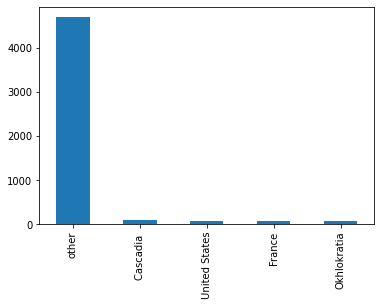

In [85]:
df['Location'].value_counts().plot(kind='bar');

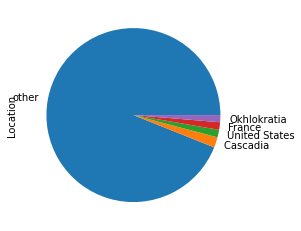

In [86]:
df['Location'].value_counts().plot(kind='pie');

# How many influential people are talking about Bill Gates (Q4)

In [87]:
df.columns

Index(['User', 'Date Created', 'Day', 'Month', 'Number of Likes',
       'Source of Tweet', 'Tweet', 'Location', 'RetweetCount', 'Is Verified',
       'Followers', 'sentiment_analysis'],
      dtype='object')

In [88]:
df['Is Verified'].sum()

107

In [89]:
verified_user_df=df[df['Is Verified']==True].groupby(['User', 'Date Created', 'Day', 'Month', 'Number of Likes',
       'Source of Tweet', 'Tweet', 'Location', 'RetweetCount', 'Is Verified',
       'Followers', 'sentiment_analysis']).size().reset_index(name='count')

In [90]:
verified_user_df.head()

,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers,sentiment_analysis,count
0,ABPNews,2022-10-05 08:44:46+00:00,5,10,11,TweetDeck,https t co JrGCc7kfEK,other,2,True,13132416,Neutral,1
1,ADIPECOfficial,2022-10-07 07:01:36+00:00,7,10,0,Twitter Web App,takes place in Abu Dhabi from 31 October 3 No...,other,0,True,16677,Neutral,1
2,ARYNEWSOFFICIAL,2022-09-22 14:43:08+00:00,22,9,38,TweetDeck,PM Shehbaz Sharif meets on sidelines https t c...,other,3,True,5084638,Neutral,1
3,AbbTakk,2022-09-22 14:06:40+00:00,22,9,11,Twitter Web App,https t co fUyTr5yU9d,other,2,True,990121,Neutral,1
4,AnthoSaintLeger,2022-10-04 20:59:46+00:00,4,10,24,Twitter Web App,Dans une vid o devenue virale un insecte vert...,other,5,True,8302,Neutral,1


In [91]:
verified_user_df['User'].unique()

array(['ABPNews', 'ADIPECOfficial', 'ARYNEWSOFFICIAL', 'AbbTakk',
       'AnthoSaintLeger', 'ArabNewsfr', 'AsianetNewsHN', 'BiIndia',
       'CNBCTV18News', 'CaulfieldTim', 'CdT_Online', 'DailyQudrat',
       'DailynewsTwit', 'DnaHindi', 'DunyaNews', 'ETCanada', 'ETNOWlive',
       'ETNowSwadesh', 'EconomicTimes', 'EconomistEvents', 'FundsIndia',
       'GQ_Germany', 'GazeteOksijen', 'Harryslaststand', 'KontanNews',
       'ManaTelanganaIN', 'MarcelloFoa', 'MobilePunch', 'MoneycontrolH',
       'NationalWorld', 'Nawaiwaqt_', 'OKMagazine', 'PTTVOnlineNews',
       'PeninsulaQatar', 'SputnikInt', 'ThePerezHilton', 'TimesNow',
       'WatsUpTV', 'ZDF', 'ZeeBusiness', 'ZeeNews', 'abati1990',
       'bartinfatihorta', 'behindwoods', 'bqprime', 'bursadabugun',
       'conserv_tribune', 'dailytimespak', 'dinathanthi',
       'giornalettismo', 'indiacom', 'klixba', 'kompascom',
       'kumarmanish9', 'legitngnews', 'manoramaonline', 'moneycontrolcom',
       'moomoosingapore', 'news_ghana', 'p

# Atleast 1000 followers as influential people

In [102]:
influential_people=verified_user_df.loc[verified_user_df['Followers']>1000] 

In [103]:
influential_people['User'].unique()

array(['ABPNews', 'ADIPECOfficial', 'ARYNEWSOFFICIAL', 'AbbTakk',
       'AnthoSaintLeger', 'ArabNewsfr', 'AsianetNewsHN', 'BiIndia',
       'CNBCTV18News', 'CaulfieldTim', 'CdT_Online', 'DailyQudrat',
       'DailynewsTwit', 'DnaHindi', 'DunyaNews', 'ETCanada', 'ETNOWlive',
       'ETNowSwadesh', 'EconomicTimes', 'EconomistEvents', 'FundsIndia',
       'GQ_Germany', 'GazeteOksijen', 'Harryslaststand', 'KontanNews',
       'ManaTelanganaIN', 'MarcelloFoa', 'MobilePunch', 'MoneycontrolH',
       'NationalWorld', 'Nawaiwaqt_', 'OKMagazine', 'PTTVOnlineNews',
       'PeninsulaQatar', 'SputnikInt', 'ThePerezHilton', 'TimesNow',
       'WatsUpTV', 'ZDF', 'ZeeBusiness', 'ZeeNews', 'abati1990',
       'bartinfatihorta', 'behindwoods', 'bqprime', 'bursadabugun',
       'conserv_tribune', 'dailytimespak', 'dinathanthi',
       'giornalettismo', 'indiacom', 'klixba', 'kompascom',
       'kumarmanish9', 'legitngnews', 'manoramaonline', 'moneycontrolcom',
       'moomoosingapore', 'news_ghana', 'p

# Q1) What is the % growth in the tweet as compared to last month?

In [104]:
print("Growth compare to two months:",round((October_df['Tweet'].count()-September_df['Tweet'].count())/September_df['Tweet'].count()*100,2))

Growth compare to two months: 47.82


# Q2) How many % of tweets were of positive sentiments


In [105]:
print("Positive Tweets:",tweets_df['sentiment_analysis'].value_counts()['Positive'])
print("Total Positive Value percentage:",round(tweets_df['sentiment_analysis'].value_counts(normalize=True)['Positive']*100,2))

Positive Tweets: 1080
Total Positive Value percentage: 21.6


# Q3) Top 5 most viral tweets (based upon retweets)


In [106]:
top_viral_tweet_df.head(5)

,User,Date Created,Day,Month,Number of Likes,Source of Tweet,Tweet,Location,RetweetCount,Is Verified,Followers,sentiment_analysis
4125,adrenaline1001,2022-09-24 20:50:26+00:00,24,9,1925,Twitter for iPhone,Macron d tourne en permanence les fonds publi...,Dans une autre dimension,1322,False,22580,Neutral
4126,flamecapitain,2022-09-24 20:44:07+00:00,24,9,809,Twitter Web App,Des milliards pour la guerre Des milliards po...,,482,False,499,Neutral
2632,YvesPDB,2022-10-02 23:25:43+00:00,2,10,1648,Twitter for iPhone,Ce est un grand criminel Tout cela pour nous ...,Paris,407,False,78962,Positive
4027,_samedi_,2022-09-25 07:49:33+00:00,25,9,435,Twitter for Android,Macron d tourne en permanence les fonds publi...,Anonymous World \n\n,322,False,9560,Neutral
556,NicolasPichot6,2022-10-15 13:46:00+00:00,15,10,375,Twitter Web App,1 2 Dr Astrid Stuckelberger La nanotechnologi...,,322,False,17022,Neutral


# Q4) How many influential people are talking about our product (whose followers are greater than 1000)


In [107]:
influential_people['User'].unique()

array(['ABPNews', 'ADIPECOfficial', 'ARYNEWSOFFICIAL', 'AbbTakk',
       'AnthoSaintLeger', 'ArabNewsfr', 'AsianetNewsHN', 'BiIndia',
       'CNBCTV18News', 'CaulfieldTim', 'CdT_Online', 'DailyQudrat',
       'DailynewsTwit', 'DnaHindi', 'DunyaNews', 'ETCanada', 'ETNOWlive',
       'ETNowSwadesh', 'EconomicTimes', 'EconomistEvents', 'FundsIndia',
       'GQ_Germany', 'GazeteOksijen', 'Harryslaststand', 'KontanNews',
       'ManaTelanganaIN', 'MarcelloFoa', 'MobilePunch', 'MoneycontrolH',
       'NationalWorld', 'Nawaiwaqt_', 'OKMagazine', 'PTTVOnlineNews',
       'PeninsulaQatar', 'SputnikInt', 'ThePerezHilton', 'TimesNow',
       'WatsUpTV', 'ZDF', 'ZeeBusiness', 'ZeeNews', 'abati1990',
       'bartinfatihorta', 'behindwoods', 'bqprime', 'bursadabugun',
       'conserv_tribune', 'dailytimespak', 'dinathanthi',
       'giornalettismo', 'indiacom', 'klixba', 'kompascom',
       'kumarmanish9', 'legitngnews', 'manoramaonline', 'moneycontrolcom',
       'moomoosingapore', 'news_ghana', 'p

# Q5) Which geographical location has the most tweets


In [108]:
df['Location'].value_counts()

other            4698
Cascadia           97
United States      70
France             70
Okhlokratia        66
Name: Location, dtype: int64

# EDA

In [109]:
tweets_df.columns

Index(['User', 'Date Created', 'Day', 'Month', 'Number of Likes',
       'Source of Tweet', 'Tweet', 'Location', 'RetweetCount', 'Is Verified',
       'Followers', 'sentiment_analysis'],
      dtype='object')

[Text(0.5, 1.0, 'Tweet Distribute by Month')]

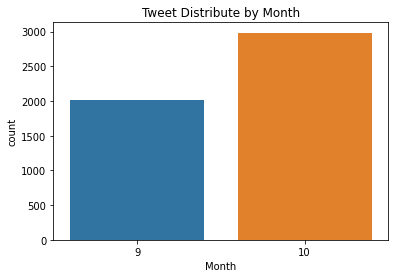

In [110]:
import seaborn as sns
sns.countplot(x="Month", data=tweets_df).set(title='Tweet Distribute by Month')

In [111]:
tweets_df['sentiment_analysis'].value_counts()

Neutral     3267
Positive    1080
Negative     654
Name: sentiment_analysis, dtype: int64

[Text(0.5, 1.0, 'Tweet Distribute by Month')]

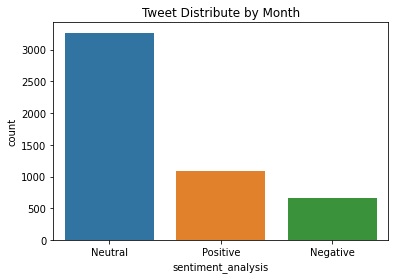

In [112]:
sns.countplot(x="sentiment_analysis", data=tweets_df).set(title='Tweet Distribute by Month')

# Influential People

In [113]:
from PIL import Image

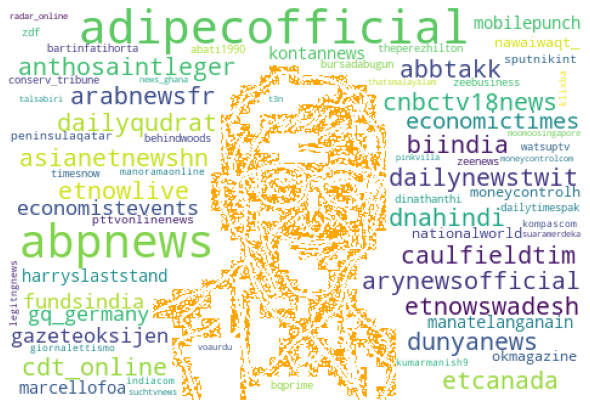

In [114]:
img_mask = np.array(Image.open("C:/Users/ALOK KUMAR AGGARWAL/Desktop/project/th.jfif"))
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in influential_people['User'].unique():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width=600, height=600,mask=img_mask, background_color = 'white',
               contour_width=1,
               contour_color='orange'
              ).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Top Viral Tweets

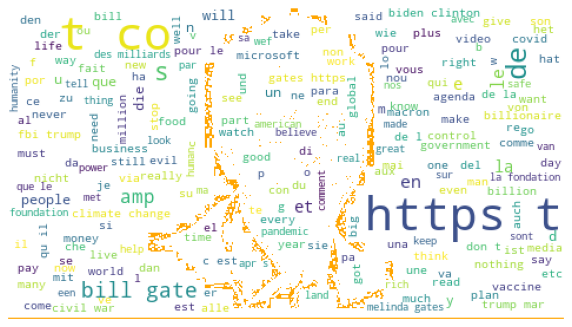

In [115]:
img_mask = np.array(Image.open("C:/Users/ALOK KUMAR AGGARWAL/Desktop/project/th (1).jfif"))
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in top_viral_tweet_df.Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


bg = WordCloud(width=600, height=600, mask= img_mask, background_color = 'white',
               contour_width=1,
               contour_color='orange'
              ).generate(comment_words)

plt.figure(figsize=[10,10])
plt.axis("off")
plt.imshow(bg)